In [ ]:
import matplotlib.pyplot as plt
from skimage.io import imread
# from skimage import data_dir
from skimage.transform import radon, iradon, rescale
image = imread("./Shepp_logan.jpg", as_gray=True)
image = rescale(image, scale=0.4)
plt.figure(figsize=(8, 8.5))
plt.subplot(221)
plt.title("Original")
plt.imshow(image, cmap=plt.cm.Greys_r)
plt.subplot(222)
projections = radon(image, theta=[0, 45, 90])
plt.plot(projections)
plt.title("Projections at\n0, 45 and 90 degrees")
plt.xlabel("Projection axis")
plt.ylabel("Intensity")
projections = radon(image)
plt.subplot(223)
plt.title("Radon transform\n(Sinogram)")
plt.xlabel("Projection axis")
plt.ylabel("Intensity")
plt.imshow(projections)
reconstruction = iradon(projections)
plt.subplot(224)
plt.title("Reconstruction\nfrom sinogram")
plt.imshow(reconstruction, cmap=plt.cm.Greys_r)
plt.subplots_adjust(hspace=0.4, wspace=0.5)
plt.show()

(0, 100)


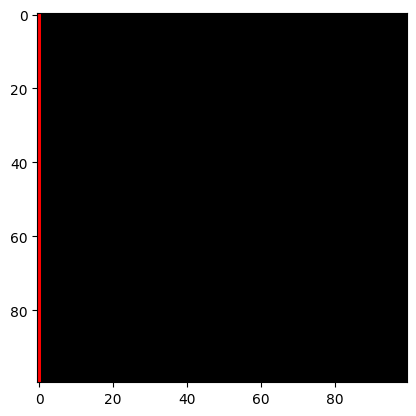

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import time
from helpers.image_exec import ImageExec

image = list()

for i in range(100):
  row = list()
  for j in range(100):
    row.append((0,0,0))
  image.append(row)

image = np.asarray(image)
# print(image)





im = ImageExec(image)

# im.draw_bresenham_line((0,0),(0,99), (255,255,255))

print(im.calc_bresenham_line((0,0),(0,99)))
plt.imshow(im.image)